<a href="https://colab.research.google.com/github/lshpy/DeepLearning_basic/blob/main/4_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 로지스틱 회귀
## 뭐든지 0과 1사이로 만들어 버리겠다



In [2]:
import pandas as pd
fish = pd.read_csv('http://bit.ly/fish_csv_data')
fish.head(5) # 행의 개수를 사이에 정수로 넣기
# fish.tail(3), tai은 반대로 가장 마지막
# head 함수로 시작부터 특정 행의 개수를 출력가능: 기본은 5개

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [3]:
# 데이터 준비하기
pd.unique(fish['Species'])
fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()

# iloc을 사용하면 모든 열의 이름을 쓰지 않아도 사용가능
# iloc을 통해 [행, 열] 의 모음으로 이어주기
# 마지막에 .to_numpy() 의 형식으로 형식 바꿔주기


fish_target = fish['Species'].to_numpy()



In [4]:
# 데이터 분할
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state=42)

In [5]:
# 모델 학습

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [6]:
# k-최근접 이웃 분류기
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier(n_neighbors=3) #k를 3이라 가정
kn.fit(train_scaled, train_target)

print(kn.score(train_scaled, train_target))
print(kn.score(test_scaled, test_target))

0.8907563025210085
0.85


In [7]:
print(kn.classes_)
# 다중분류: 타깃데이터에 2개 이상의 클래스가 들어간 경우--> 클래스 이름을 여기에 저장
# 순서는 자동으로 알파벳 순으로 정렬이 된다.
# pd.unique(fish['Species']) 와는 다름

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [8]:
# 처음 5개의 샘플의 타깃값을 예측하자

print(kn.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']


In [9]:
# 클래스별의 확률을 np로 봐서 왜 뽑혔는지를 알아보자

import numpy as np
proba = kn.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=4)) # 4자리 까지 끊어서 확인가능
# 소수점 4자리의 proba를 round해서 출력하기

# 5행 7열
#7열은 classes_의 순서(알파벳) 그대로
# 5행은 가장 처음의 5개

[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]


In [10]:
# 거리로 확률값이 맞는지를 재확인하자

distances, indexes = kn.kneighbors(test_scaled[3:4])
print(train_target[indexes])
# 4번째 거의 인덱스는 perch 2개, roach 1개
# perch = 0.66, roach = 0.33-->확률 맞음

[['Roach' 'Perch' 'Perch']]


로지스틱 회귀

선형방정식을 학습

z = 변수 * 가중치

확률(0~100) 으로 나타낼려면 > z 사이가 촘촘 --> 시드모이드 함수
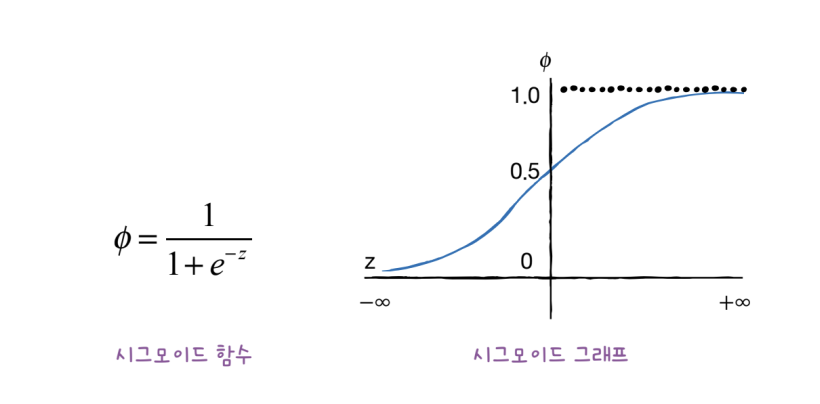

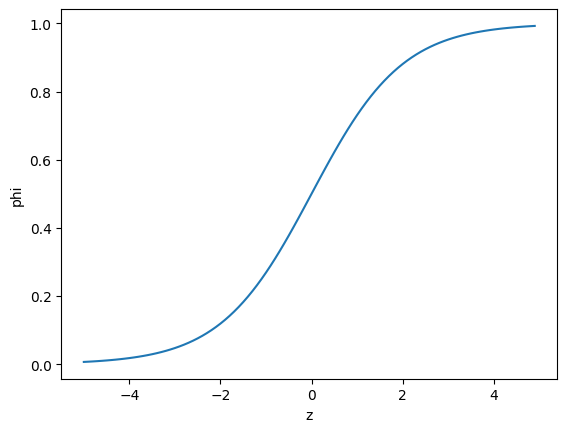

In [11]:
# 시그모이드 함수
# 아무리 무한으로 발산해도 0~1 사이값을 벗어나지 않음(굿)


import numpy as np
import matplotlib.pyplot as plt
z = np.arange(-5, 5, 0.1) # -5에서 5까지 0.1의 간격으로

phi = 1/(1 + np.exp(-z))
plt.plot(z,phi)
plt.xlabel('z')
plt.ylabel('phi')
plt.show()

로지스틱 회귀로 이진 분류 수행하기

In [12]:
# numpy는 bool형을 알아서 변환해서 넣어줄 수 있음
# 불리언 인덱싱(boolean indexing)

char_arr = np.array(['A', 'B', 'C', 'D', 'E'])
print(char_arr[[True, False, True, True, False]])
# True인 부분만 출력을 해준다

['A' 'C' 'D']


In [13]:
# 단순히 뭔가를 정의하는 것으로 정의된것은 true, 아닌것은 false로 출력할 수 있다
# 역시 파이썬은 굉장히 똑똑하고 편리한 언어인것은 확실하군

bream_smelt_indexes = (train_target =='Bream')| (train_target =='Smelt')
# bream인거는 true, 아닌것은 false로 해줘 ~~ or smelt
# 결론적으로 > bream 이나 smelt 가 아닌 생선은 그냥 보여주지 마
# only bream or smelt 가 있는 걸로

train_bream_smelt = train_scaled[bream_smelt_indexes]
target_bream_smelt = train_target[bream_smelt_indexes]



In [14]:
# 모델 학습

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_bream_smelt, target_bream_smelt)

LogisticRegression()

In [15]:
# 로지스틱 회귀를 통해 예측

print(lr.predict(train_bream_smelt[:5]))
# 처음 5개의 샘플을 예측

['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']


In [16]:
print(lr.predict_proba(train_bream_smelt[:5]))
# 확률이 높은 쪽으로 결정됨
# 0열 : Bream
# 1열 : Smelt
# 알파벳 순으로 정렬

print(lr.classes_)

[[0.99759855 0.00240145]
 [0.02735183 0.97264817]
 [0.99486072 0.00513928]
 [0.98584202 0.01415798]
 [0.99767269 0.00232731]]
['Bream' 'Smelt']


In [17]:
# 로지스틱도 어쨋든 선형회귀니까 계수를 가지고 있음
print(lr.coef_, lr.intercept_)

[[-0.4037798  -0.57620209 -0.66280298 -1.01290277 -0.73168947]] [-2.16155132]


In [18]:
# 로지스틱 모델로 z값을 계산해 볼 수 있을까? YES
# lr.decision_functino()

decisions = lr.decision_function(train_bream_smelt[:5])
print(decisions)

[-6.02927744  3.57123907 -5.26568906 -4.24321775 -6.0607117 ]


In [19]:
# 마지막으로 z값을  시그모이드 함수에 집어넣으면 확률(퍼센트) 탄생

from scipy.special import expit
print(expit(decisions))


# predict_proba 랑 비슷하다
print(lr.predict_proba(train_bream_smelt[:5]))

[0.00240145 0.97264817 0.00513928 0.01415798 0.00232731]
[[0.99759855 0.00240145]
 [0.02735183 0.97264817]
 [0.99486072 0.00513928]
 [0.98584202 0.01415798]
 [0.99767269 0.00232731]]


로지스틱 회귀로 다중 분류 수행하기


In [22]:
# logisticregression 클래스는 기본적으로 반복적인 알고리즘을 사용
# max_iter = 100, 반복횟수를 지정가능 --> 부족하면 오류 > 1000
#L2 규제: 과대적합 방지ㅡ, 계수의 제곱을 규제한다
# alpha > C : C (기본값:1) 가 작을수록 규제는 커짐(반비례)
# 규제완화: C 의 값을 늘린다 (C=20)


lr = LogisticRegression(C=20, max_iter=1000)
lr.fit(train_scaled, train_target)

print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))


0.9327731092436975
0.925


In [24]:
# 5개에 대한 예측

print(lr.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Roach' 'Perch']


In [28]:
# 예측 확률

proba = lr.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=3))

# 5행 7열

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


In [30]:
# 7열의 정보는 class를 보면 알 수 있다

print(lr.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [31]:
print(lr.coef_.shape, lr.intercept_.shape)

# 2차원, 1차원
# 다중분류는 클래스마다 z값을 하나씩 계산한다
# 그 중 가장 높은 예측값을 내는 클래스가 예측 클래스가 된다


# z값으로 바꾸는 과정
# 시그모이드 >>> 소프트맥스

(7, 5) (7,)


소프트 맥스

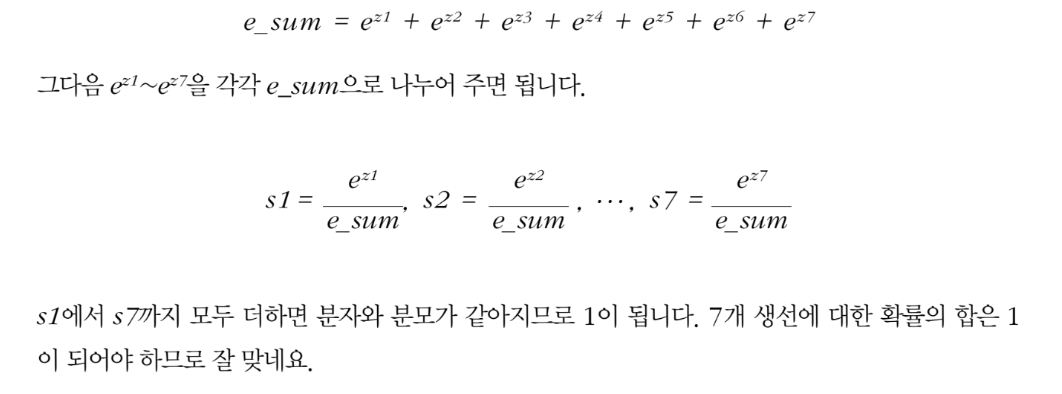

In [32]:
# 각각의 예측값을 모두 더하면 1이 나옴
# 각각의 값은 모두 0과 1 사이


In [35]:
# decision 함수에 따라 z의 값을 구한다
decision = lr.decision_function(test_scaled[:5])
print(np.round(decision, decimals=2))



[[ -6.5    1.03   5.16  -2.73   3.34   0.33  -0.63]
 [-10.86   1.93   4.77  -2.4    2.98   7.84  -4.26]
 [ -4.34  -6.23   3.17   6.49   2.36   2.42  -3.87]
 [ -0.68   0.45   2.65  -1.19   3.26  -5.75   1.26]
 [ -6.4   -1.99   5.82  -0.11   3.5   -0.11  -0.71]]


In [37]:
# 소프트 맥스 함수로 실제 확률처럼 만든다

from scipy.special import softmax
proba = softmax(decision ,axis =1)
# axis=1 : 가로에 대해서 하세요
# 각 행에서 7가지 클래스 중에서 가장 큰 거를 찾아주세요~ 니까 당연히 행에 따라서 해야함

print(np.round(proba, decimals=3))
# 각 행마다 모두 더한값을 보면 1이다!

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]
